# **Big Mart Sales Prediction Analysis**

**PROBLEM STATEMENT :**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.
 
 
 We will be following the table of content given below.

1).Problem Statement

2).Hypothesis Generation

3).Loading Packages and Data

4).Data Structure and Content

5).Exploratory Data Analysis

6).Univariate Analysis

7).Bivariate Analysis

8).Missing Value Treatment

9).Feature Engineering

10).Encoding Categorical Variables

11).Label Encoding

12).One Hot Encoding

13).PreProcessing Data

14).Modeling

15).Linear Regression

16).Regularized Linear Regression

17).RandomForest

18).XGBoost

19).Summary

**Hypothesis Generation :**

**Store based hypothesis-**

1.Stores in tier1 cities should have higher sales

2.Stores which have more capacity have higher sales

3.competition nearby reduce the sales of store 

**Product based hypothesis-**

1.Branded products have higher sales, becuase of more trust by consumer

2.daily use products are more likely to sell as compared to specific use products

3.products with offers and discount will sell more.

**Loading Packages and Data**

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
%matplotlib inline

In [299]:
train_data = pd.read_csv("/kaggle/input/big-mart-sales-prediction-datasets/Train.csv")

In [300]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [301]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [302]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [303]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [304]:
train_data.shape

(8523, 12)

**Data Structure and Content**

In [305]:
type(train_data)


pandas.core.frame.DataFrame

In [306]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**Exploratory Data Analysis**

In [307]:
# Checking for null values
train_data.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [308]:
train_data.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are missing values in our datasets



In [309]:
train_data["Item_Type"].value_counts()


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [310]:
train_data["Item_Fat_Content"].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [311]:
duplicate=train_data.duplicated()
duplicate.sum()

0

There are no duplicates in our datasets



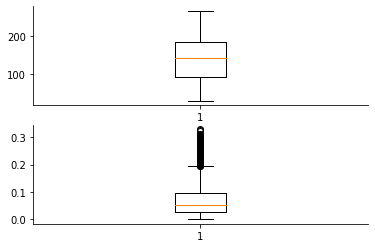

In [312]:
fig, ax = plt.subplots(2, 1)

ax[0].boxplot(train_data["Item_MRP"])
ax[1].boxplot(train_data["Item_Visibility"])

plt.show()

There are outliers in our data 

**Missing value Treatment**

In [313]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [314]:
# Handling the missing values in Item_Weight attribute
train_data["Item_Weight"].head()

0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

In [315]:
# Item_Weight is a continous attribute so we will replace the missing values with mean.
train_data["Item_Weight"] = train_data["Item_Weight"].fillna(train_data["Item_Weight"].mean())
train_data["Item_Weight"].isnull().sum()

0

In [316]:
# Handling the missing values in Outlet_Size attribute
train_data["Outlet_Size"].head(10)

0    Medium
1    Medium
2    Medium
3       NaN
4      High
5    Medium
6      High
7    Medium
8       NaN
9       NaN
Name: Outlet_Size, dtype: object

In [317]:
# Outlet_Size is a categorial attribute so replacing the null values with mode.
train_data["Outlet_Size"] = train_data["Outlet_Size"].fillna(str(train_data["Outlet_Size"].mode()))
train_data["Outlet_Size"].isnull().sum()
     

0

In [318]:
#checking null values
train_data.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

There are no null values remaining in the dataset

**Univariate Analysis**

**Item Fat Content**

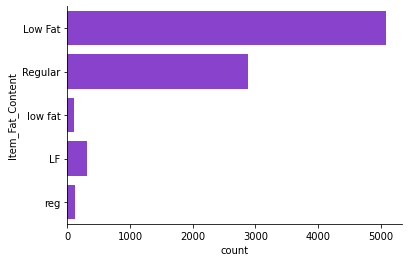

In [319]:
sns.countplot(y = 'Item_Fat_Content', data = train_data,color='blueviolet')
sns.despine()

**Item_visiblity**

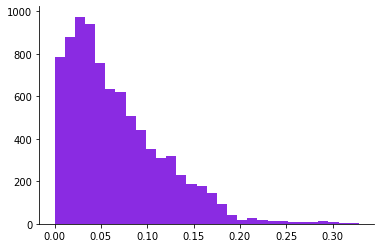

In [320]:
plt.hist(x = 'Item_Visibility',data = train_data,bins = 30,color='blueviolet')
plt.rc("axes.spines", top=False, right=False)

**Item_Weight**

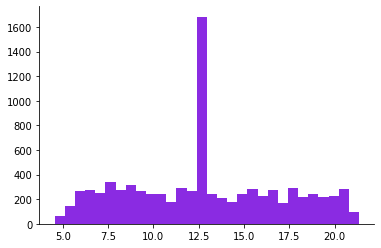

In [321]:
plt.hist(x = 'Item_Weight',data = train_data,bins = 30,color='blueviolet')
plt.rc("axes.spines", top=False, right=False)

**Item_Type**

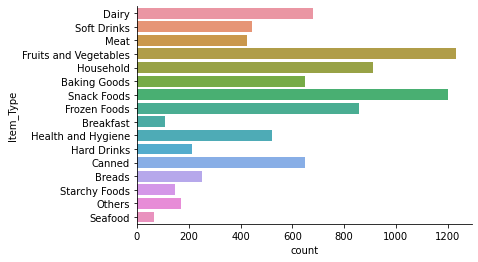

In [322]:
sns.countplot(y = 'Item_Type', data = train_data)
sns.despine()

* Quantity of snack food and fruits & vegetables is highest and sea food quantity is least

**Item_MRP**

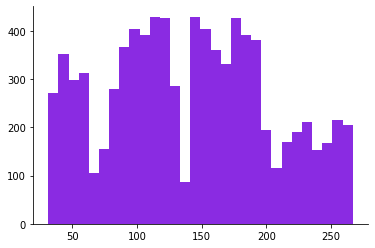

In [323]:
plt.hist(x = 'Item_MRP',data = train_data,bins = 30,color='blueviolet')
plt.rc("axes.spines", top=False, right=False)

* Unevenly distributed

**Outlet_Establishment_Year**

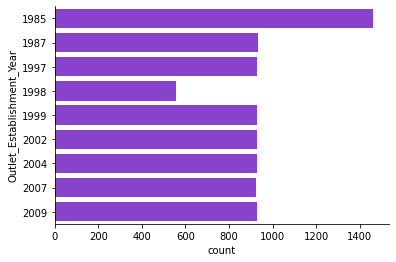

In [324]:
sns.countplot(y = 'Outlet_Establishment_Year', data = train_data,color='blueviolet')
sns.despine()

* Most number of Stores were established in the year 1985

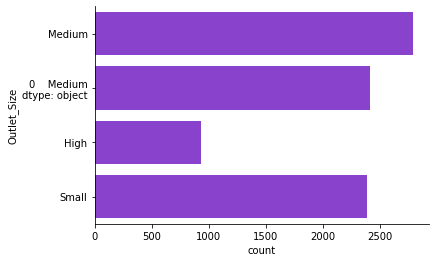

In [325]:
sns.countplot(y="Outlet_Size", data= train_data,color='blueviolet')
sns.despine()

* Comparitively there are more medium and small sized stores in number.(missing values replaced with medium)



**Outlet_Location_Type**

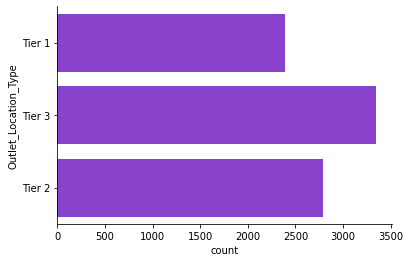

In [326]:
sns.countplot(y = 'Outlet_Location_Type', data = train_data,color='blueviolet')
sns.despine()

* Tier3>Tier2>Tier1 (Number of stores)

**Outlet_Type**

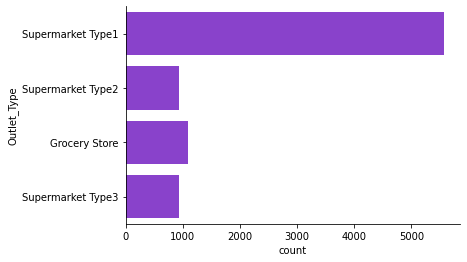

In [327]:
sns.countplot(y = 'Outlet_Type', data = train_data,color='blueviolet')
sns.despine()

* Supermarket Type 1 stores are the highest as compare to other type of stores

**Bi Variate Analysis**

In [328]:
train_data.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


*  **Heatmap**

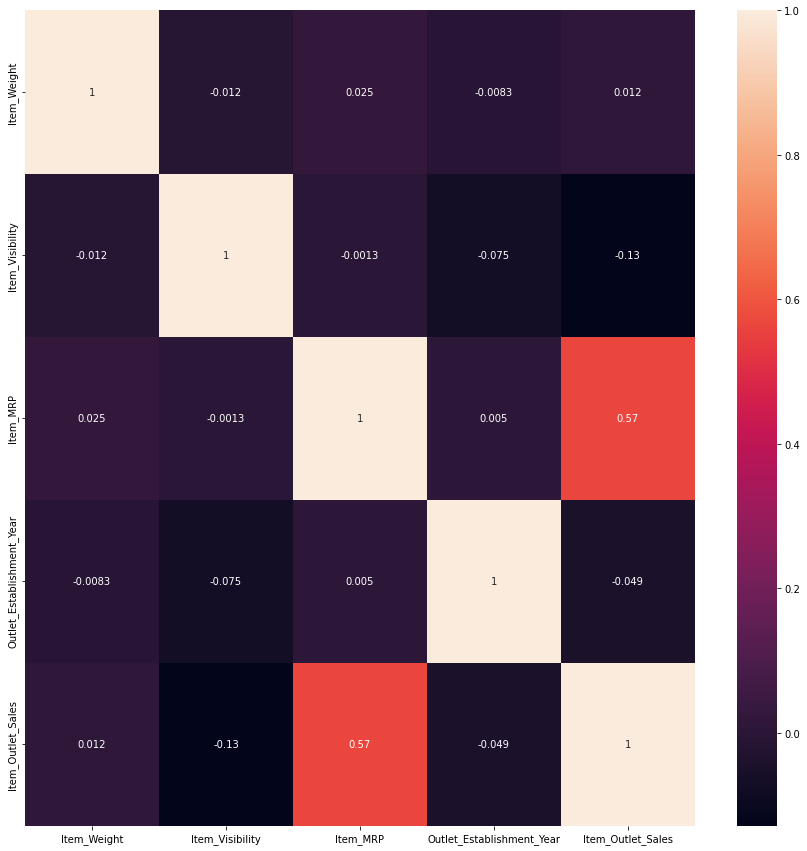

In [329]:
plt.figure(figsize =(15,15))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

<Figure size 720x720 with 0 Axes>

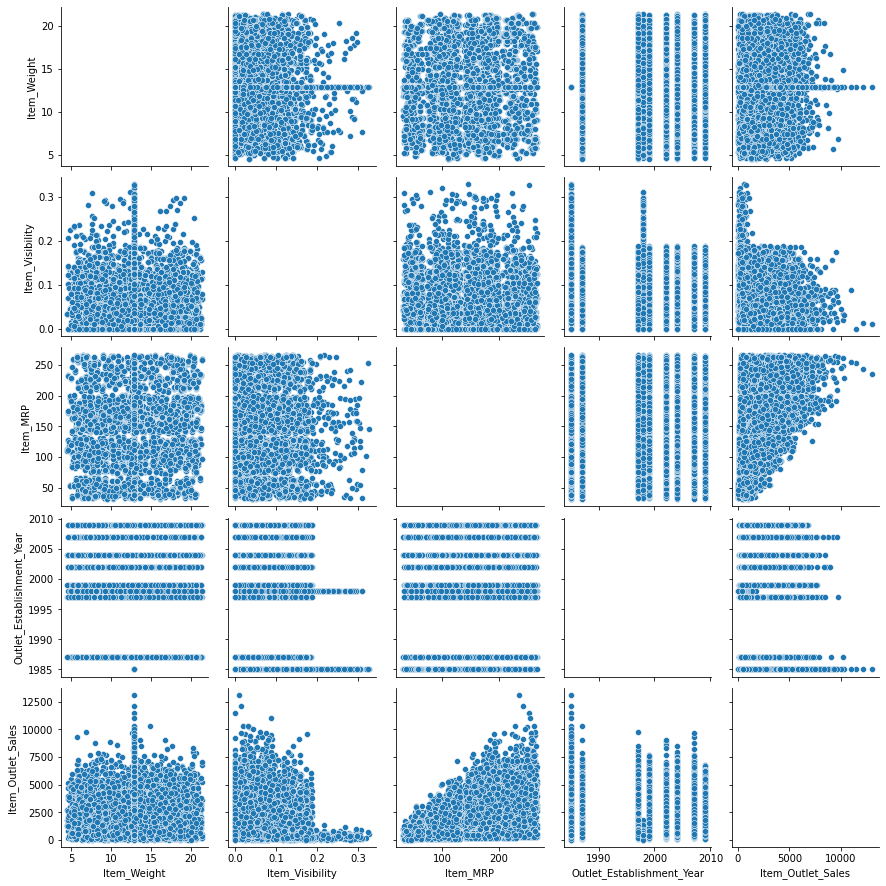

In [330]:
plt.figure(figsize =(10,10))
sns.pairplot(train_data,diag_kind="lower")


**Encoding categorical to numerical**

In [331]:
# Importing the required libary
from sklearn import preprocessing

In [332]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0 Medium\ndtype: object,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [333]:
df=train_data


* Creating dummy columns for the column Outlet_Identifier and drop the columns which are not required for our training purpose along with the label column for obvious reason



In [334]:
dum_t = pd.get_dummies(train_data['Outlet_Type'])
dum_l = pd.get_dummies(train_data['Outlet_Location_Type'])
dum_s = pd.get_dummies(train_data['Outlet_Size'])
dum_i = pd.get_dummies(train_data['Item_Fat_Content'])

df1 = pd.concat([train_data,dum_t,dum_l,dum_s,dum_i],axis=1)

label = df1['Item_Outlet_Sales']

train = df1.drop(columns=['Item_Identifier','Item_Weight','Outlet_Identifier','Item_Outlet_Sales','Item_Type','Outlet_Size','Outlet_Establishment_Year','Outlet_Type','Outlet_Location_Type','Item_Fat_Content'])


In [335]:
train.head()


,Item_Visibility,Item_MRP,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Tier 1,Tier 2,Tier 3,0 Medium\ndtype: object,High,Medium,Small,LF,Low Fat,Regular,low fat,reg
0,0.016047,249.8092,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0
1,0.019278,48.2692,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
2,0.016760,141.6180,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0
3,0.000000,182.0950,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
4,0.000000,53.8614,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0


**Model Building**

In [336]:
# Importing Required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

* **Linear Regression**

In [337]:
train.columns


Index(['Item_Visibility', 'Item_MRP', 'Grocery Store', 'Supermarket Type1',
       'Supermarket Type2', 'Supermarket Type3', 'Tier 1', 'Tier 2', 'Tier 3',
       '0    Medium\ndtype: object', 'High', 'Medium', 'Small', 'LF',
       'Low Fat', 'Regular', 'low fat', 'reg'],
      dtype='object')

In [338]:
x_train , x_test , y_train , y_test = train_test_split(train , label , test_size = 0.40,random_state = 101)


In [339]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [340]:
reg.score(x_test,y_test)


0.5679608141329282

**Laaso regression**


In [341]:
LS=Lasso(alpha=0.05)
LS.fit(x_train,y_train)


Lasso(alpha=0.05)

In [342]:
LS.score(x_test,y_test)


0.5680045674779743

**GradientBoostingRegressor**

In [343]:
grad = GradientBoostingRegressor(n_estimators = 100)
grad.fit(x_train,y_train)

GradientBoostingRegressor()

In [344]:
GradientBoostingRegressor()


GradientBoostingRegressor()

In [345]:
grad.score(x_test, y_test)


0.6058562565955093

**RandomForestRegressor**



In [346]:
ran = RandomForestRegressor(n_estimators = 50)
ran.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50)

In [347]:
RandomForestRegressor(n_estimators=50)


RandomForestRegressor(n_estimators=50)

In [348]:
ran.score(x_test, y_test)


0.535308626135987

**Conclusion:**
The first model we use is Linear Regression score : 0.57

The second model we use is Lasso Regression score : 0.57

The third model we use is GradientBoostingRegressor score : 0.60

The fourth model used is RandomForestRegressor accuracy : 0.55

From the above four models which have been used for analysis we find that GradientBoostingRegressor is the best among the four.

In [350]:
# Saving the model
from joblib import Parallel, delayed
import joblib
  
# Save the model as a pickle in a file
joblib.dump(grad, 'model.pkl')

['model.pkl']